<a href="https://colab.research.google.com/github/denuradhan/PCVK_Advance/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


<ipython-input-2-70c4bbe791c7>:22: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


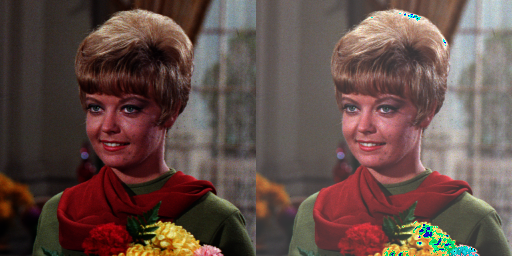

In [2]:

from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original = cv.imread(image_path)
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

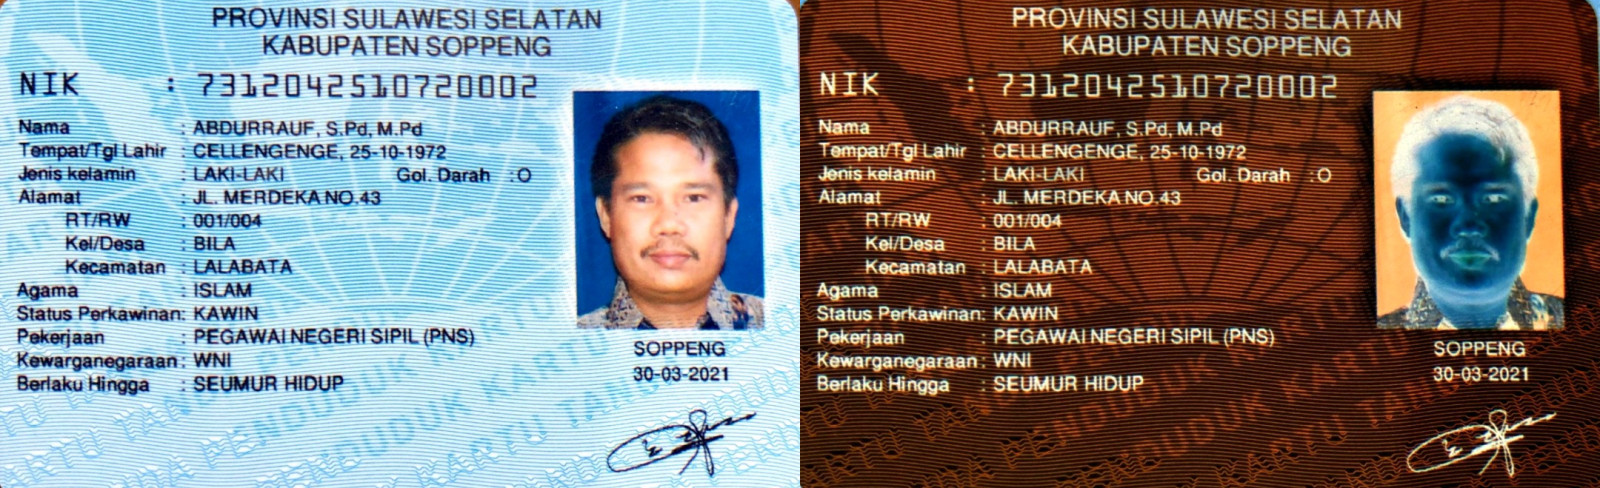

In [7]:
# tugas praktikum nomor 1

ktp_image_path = '/content/drive/MyDrive/Praktek/KTP.jpeg'
img = cv.imread(ktp_image_path)
# convert img from bgr to rgb
img2 = cv.imread(ktp_image_path)
# inverse img2 using g(x) = 255 − f(x)
for y in range(img2.shape[0]):
  for x in range(img2.shape[1]):
    for c in range(img2.shape[2]):
      img2[y,x,c] = 255 - img2[y,x,c]

final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)


Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


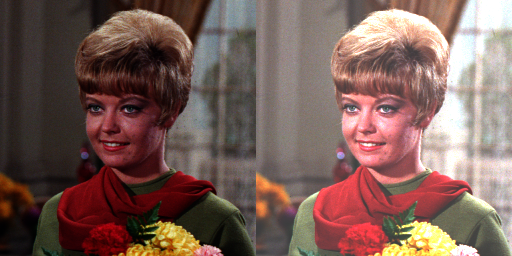

In [ ]:
# tugas praktikum nomor 2
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread(image_path)
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


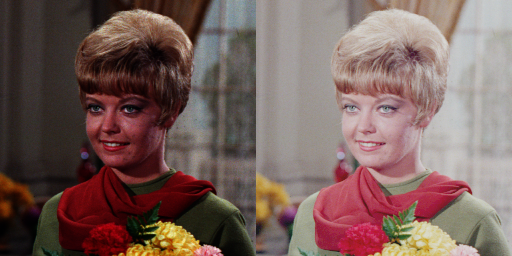

In [ ]:
# tugas praktikum nomor 3
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread(image_path)
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Before :  [156  77  21]


<ipython-input-27-74ee90499db4>:9: RuntimeWarning: overflow encountered in scalar add
  plt_image2[y,x] = (plt_image2[y,x,0] + plt_image2[y,x,1] + plt_image2[y,x,2]) / 3


After :  [84 84 84]


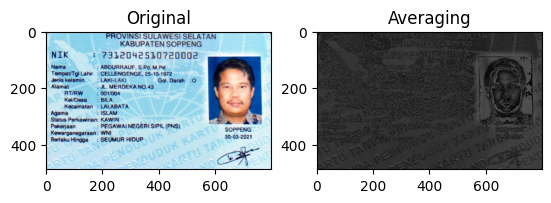

In [27]:
# tugas 4 A. Averaging
plt_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_image2 = plt_image.copy()

# convert plt_image2 to grayscale using average method (R+G+B)/3
print("Before : ",plt_image2[0,0])
for y in range(plt_image2.shape[0]):
  for x in range(plt_image2.shape[1]):
    plt_image2[y,x] = (plt_image2[y,x,0] + plt_image2[y,x,1] + plt_image2[y,x,2]) / 3
print("After : ",plt_image2[0,0])

fig, (ax1,ax2) = plt.subplots(1, 2)

ax1.imshow(plt_image)
ax1.set_title('Original')

ax2.imshow(plt_image2)
ax2.set_title('Averaging')

plt.show()

Before :  [156  77  21]


<ipython-input-29-318eb6fd3bff>:9: RuntimeWarning: overflow encountered in scalar add
  plt_image2[y,x] = (max(plt_image2[y,x,0], plt_image2[y,x,1], plt_image2[y,x,2]) + min(plt_image2[y,x,0], plt_image2[y,x,1], plt_image2[y,x,2])) / 2


After :  [88 88 88]


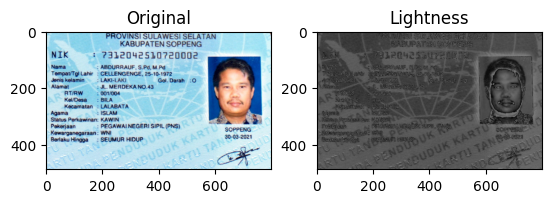

In [29]:
# tugas 4 B. Lightness
plt_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_image2 = plt_image.copy()

# convert plt_image2 to grayscale using average Lightness method
print("Before : ",plt_image2[0,0])
for y in range(plt_image2.shape[0]):
  for x in range(plt_image2.shape[1]):
    plt_image2[y,x] = (max(plt_image2[y,x,0], plt_image2[y,x,1], plt_image2[y,x,2]) + min(plt_image2[y,x,0], plt_image2[y,x,1], plt_image2[y,x,2])) / 2
print("After : ",plt_image2[0,0])

fig, (ax1,ax2) = plt.subplots(1, 2)

ax1.imshow(plt_image)
ax1.set_title('Original')

ax2.imshow(plt_image2)
ax2.set_title('Lightness')

plt.show()

Before :  [156  77  21]
After :  [89 89 89]


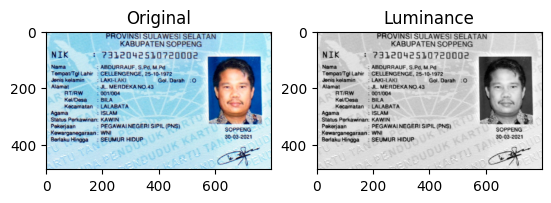

In [30]:
# tugas 4 C. Lightness
plt_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_image2 = plt_image.copy()

# convert plt_image2 to grayscale using average Luminance method
print("Before : ",plt_image2[0,0])
for y in range(plt_image2.shape[0]):
  for x in range(plt_image2.shape[1]):
    plt_image2[y,x] = 0.2126 * plt_image2[y,x,0] + 0.7152 * plt_image2[y,x,1] + 0.0722 * plt_image2[y,x,2]
print("After : ",plt_image2[0,0])

fig, (ax1,ax2) = plt.subplots(1, 2)

ax1.imshow(plt_image)
ax1.set_title('Original')

ax2.imshow(plt_image2)
ax2.set_title('Luminance')

plt.show()

Before :  [156  77  21]
After :  [156  77  21]


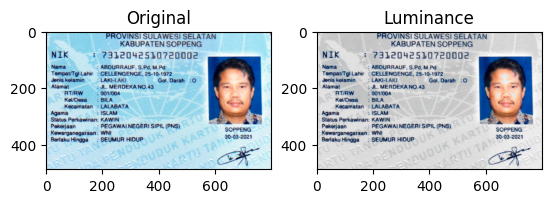

In [44]:
# tugas 5
plt_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_image2 = plt_image.copy()

# convert plt_image2 to grayscale using average Luminance method
print("Before : ",plt_image2[0,0])
for y in range(plt_image2.shape[0]):
  for x in range(plt_image2.shape[1]):
    if plt_image2[y,x,2] > 200:
      plt_image2[y,x] = 0.2126 * plt_image2[y,x,0] + 0.7152 * plt_image2[y,x,1] + 0.0722 * plt_image2[y,x,2]
print("After : ",plt_image2[0,0])

fig, (ax1,ax2) = plt.subplots(1, 2)

ax1.imshow(plt_image)
ax1.set_title('Original')

ax2.imshow(plt_image2)
ax2.set_title('Luminance')

plt.show()